# Al-Fe order-disorder transition

In [1]:
from pycalphad import Database, equilibrium, variables as v
import matplotlib.pyplot as plt

## Load database and compute an equilibrium calculation at X(AL)=0.2, stepping in temperature

In [2]:
dbf = Database('Al-Fe_Seiersten.tdb')
comps = ['AL', 'FE', 'VA']
phases = ['B2_BCC']
conds = {v.P: 101325, v.N: 1, v.X('AL'): 0.20, v.T: (500, 1500, 10)}
eq_res = equilibrium(dbf, comps, ['B2_BCC'], conds, output='DOO')  # Add "degree_of_ordering" property

In [3]:
# Construct a model so the site fractions can be extracted
from pycalphad import Model
mod = Model(dbf, comps, 'B2_BCC')

## Plot degree of ordering

Text(0.5, 1.0, 'Ordering transition in B2_BCC')

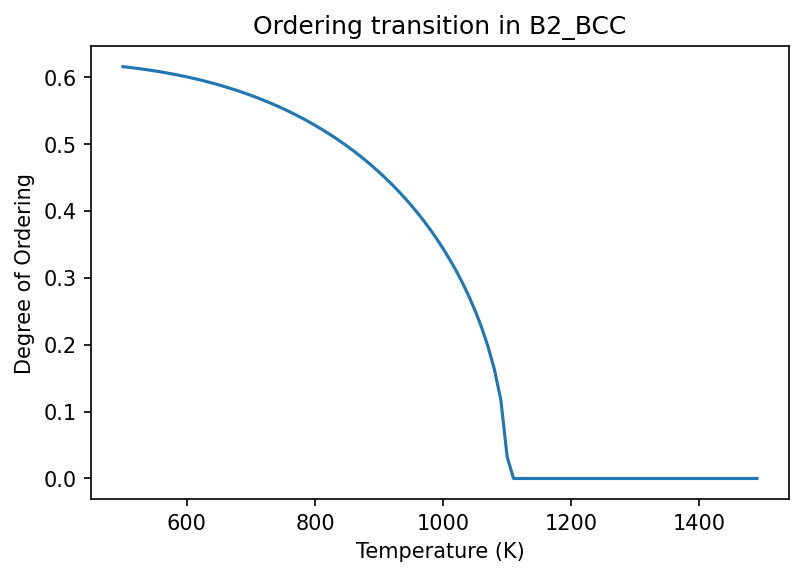

In [4]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot()

masked_eq_res = eq_res.where(eq_res.Phase == 'B2_BCC')
ax.plot(masked_eq_res.T.broadcast_like(masked_eq_res.DOO).squeeze(), masked_eq_res.DOO.squeeze())

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Degree of Ordering')
ax.set_title('Ordering transition in B2_BCC')

## Plot the site fractions

The order to disorder transition happens at approximately 1100 K, where the site fractions of Al and Fe on each sublattice become the same.

Note that for bcc, the two sublattices are symmetrically equivalent, so that is why some of the blue/green points (Al in each sublattice) and orange/red points (Fe in each sublattice) can be swapped at low temperature.

Text(0.5, 1.0, 'Ordering transition in B2_BCC')

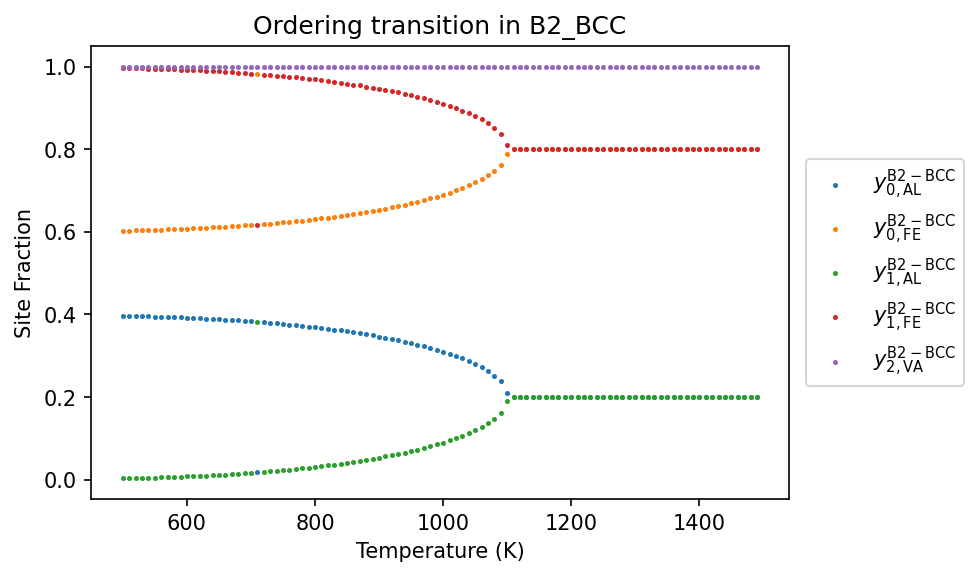

In [5]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot()

# Plot site fractions by index and label them using the ._latex() feature of SymPy symbols
for sf_idx, sf_sym in enumerate(mod.site_fractions):
    masked_eq_res = eq_res.where(eq_res.Phase == 'B2_BCC').isel(internal_dof=sf_idx)
    ax.scatter(masked_eq_res.T.broadcast_like(masked_eq_res.Y).squeeze(), masked_eq_res.Y.squeeze(), s=2, label=f'${sf_sym._latex()}$')

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Site Fraction')
ax.set_title('Ordering transition in B2_BCC')